In [66]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Oct 18

@author: yaning
"""

import HH_original.HH as HH
import importlib
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# presynapse spikes three times
tsp_pre = [50,100,150]
# postsynapse spikes three times
tsp_post = [55, 130, 180]

e_init = 0.7
tau_rec = 10
u_se = 0.5
pointCount = 200
times = np.arange(pointCount)
h = 1

tau_pre = 20
w_init = 1
learning_rate = 0.5

tau_decay = 10
g_decay_init = 1
tau_rise = 15
g_rise_init = 1



In [68]:
def runge_kutta(f, y0, h, *arg):
    k1 = f(y0, *arg)
    k2 = f(y0 + h*k1/2, *arg)
    k3 = f(y0 + h*k2/2, *arg)
    k4 = f(y0 + h*k3, *arg)

    e_next = y0 + 1/6*(k1 + 2*k2 + 2*k3 + k4)

    return e_next

# integrate function for weight
def integrate(past, current):
    integrate_result = 0
    for i in past:
        integrate_result += np.exp(-(current-i)/tau_pre)
    return integrate_result

In [69]:
# functions for e(m,n) synaptic efficacy
# analytical within non-spike period
def e_normal_analytical(t_step):
    e = 1-np.exp(-t_step/tau_rec)*(1-e_init)
    return e

def e_update(e, etsp):
    return (1-e)/tau_rec - u_se*etsp

In [70]:
# w(m,n) synapse weight
def w_update(past_pre, past_post, t_step):
    return learning_rate*integrate(
        past_pre, t_step)*integrate(past_post, t_step)

In [71]:
def g_decay_update(g_decay, w, e):
    return -g_decay/tau_decay + w*e

def g_rise_update(g_rise, w, e):
    return -g_rise/tau_rise + w*e

In [72]:
# run the process
e = e_init
w = w_init
g_decay = g_decay_init
g_rise = g_rise_init
e_list = []
w_list = []
g_decay_list = []
g_rise_list = []
g = 0
g_list = []
past_pre = []
past_post = []

for t_step in times:
    # updating e value
    if t_step not in tsp_pre:
        e = runge_kutta(e_update, e, h, 0)
    else:
        e = runge_kutta(e_update, e, h, e)
        past_pre.append(t_step)
    e_list.append(e)

    # updating w value
    if t_step in tsp_post:
        past_post.append(t_step)
        w += w_update(past_pre, past_post, t_step)
    w_list.append(w)

    # updating g_decay based on e and w
    if t_step not in tsp_pre:
        g_decay = runge_kutta(g_decay_update, g_decay, h, 0,0)
        g_rise = runge_kutta(g_rise_update, g_rise, h, 0, 0)
    else:
        g_decay = runge_kutta(g_decay_update, g_decay, h, w, e)
        g_rise = runge_kutta(g_rise_update, g_rise, h, w, e)
    g_decay_list.append(g_decay)
    g_rise_list.append(g_rise)
    g = g_rise - g_decay
    g_list.append(g)



In [73]:
e_list = np.array(e_list)
w_list = np.array(w_list)
g_decay_list = np.array(g_decay_list)
g_rise_list = np.array(g_rise_list)
g_list = np.array(g_list)

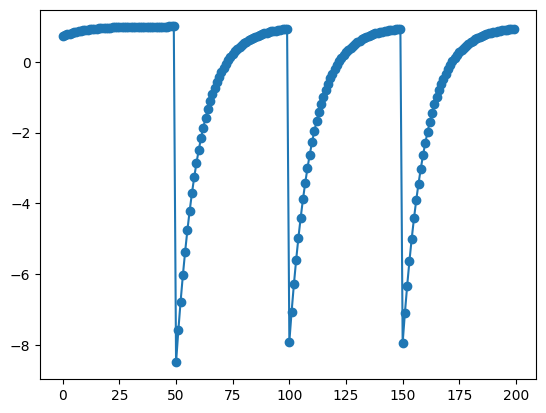

In [74]:
plt.plot(times, e_list, marker='o', linestyle='-')

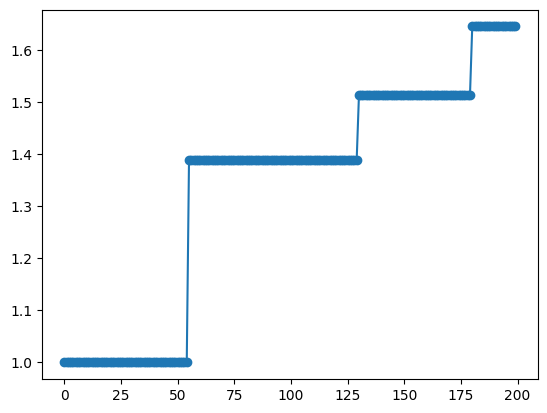

In [75]:
plt.plot(times, w_list, marker='o', linestyle='-')

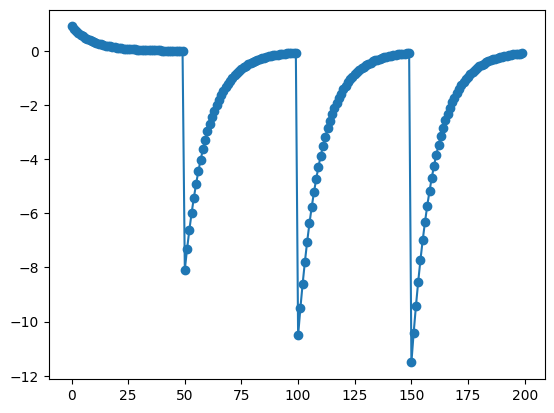

In [76]:
plt.plot(times, g_decay_list, marker='o', linestyle='-')

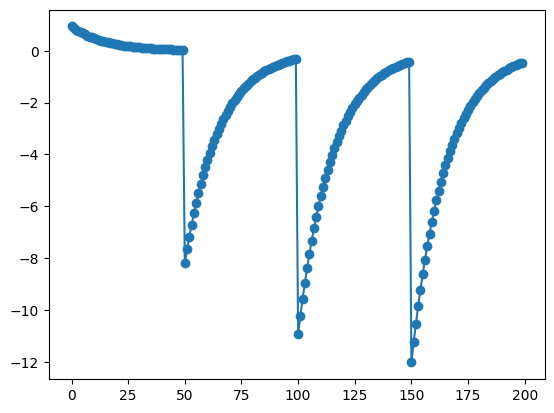

In [77]:
plt.plot(times, g_rise_list, marker='o', linestyle='-')

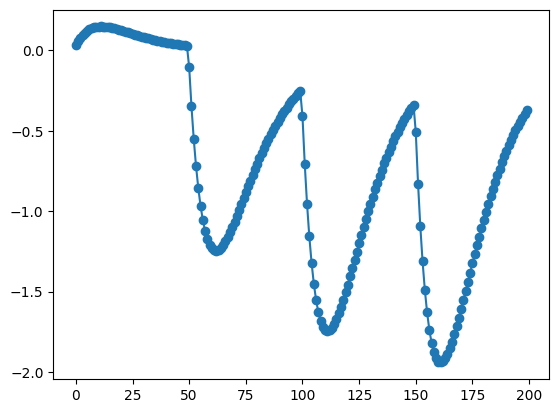

In [78]:
plt.plot(times, g_list, marker='o', linestyle='-')